# MVP - Análise da Qualidade de Vinhos
**Aluna:** Mirela Athayde  
**Curso:** Pós-graduação em Ciência de Dados & Analytics - PUC-Rio  
**Disciplina:** Análise Exploratória e Pré-processamento de Dados

## Introdução
Este notebook apresenta a análise exploratória e pré-processamento de dados do dataset Wine Quality, que contém dados físico-químicos e sensoriais de vinhos tintos portugueses.


## 1. Definição do Problema



### 1.1 Descrição do Problema
O objetivo deste projeto é analisar as características físico-químicas de vinhos tintos e entender como elas influenciam na qualidade do vinho.

### 1.2 Tipo de Problema
Este é um problema de aprendizado supervisionado, onde temos:
- Variáveis de entrada: características físico-químicas do vinho
- Variável alvo: qualidade do vinho (score de 0 a 10)

### 1.3 Premissas e Hipóteses
- A qualidade do vinho é influenciada por suas características físico-químicas
- Existe correlação entre certas características e a qualidade final
- Os dados coletados são representativos da população de vinhos tintos

### 1.4 Restrições e Condições
- Dataset limitado a vinhos tintos portugueses
- Avaliações de qualidade são subjetivas, realizadas por especialistas

## 2. Análise de Dados


### 2.1 Importação das Bibliotecas e Carregamento dos Dados
Nesta seção faremos a importação das bibliotecas necessárias e o carregamento inicial do dataset.

In [11]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para exibição dos gráficos
plt.style.use('default')
sns.set_theme()
%matplotlib inline

# Configuração para exibir todas as colunas do DataFrame
pd.set_option('display.max_columns', None)

In [12]:
# Carregamento dos dados
url = 'https://raw.githubusercontent.com/sprintpucanalisededadosmirela/mvp-pucrio-analytics/refs/heads/main/winequality-red.csv'
df = pd.read_csv(url, sep=';')

### 2.2 Análise Descritiva Inicial
Nesta seção vamos analisar as características básicas do nosso dataset, incluindo sua estrutura, tipos de dados e estatísticas descritivas.

- Verificação das dimensões do dataset
- Tipos de dados de cada coluna
- Visualização das primeiras linhas
- Resumo estatístico dos atributos

In [14]:
# Visualização das primeiras linhas
print("\nPrimeiras 5 linhas do dataset:")
df.head()


Primeiras 5 linhas do dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
# Informações sobre o dataset
print("\nInformações sobre o dataset:")
df.info()


Informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [16]:
# Estatísticas descritivas
print("\nEstatísticas descritivas:")
df.describe()


Estatísticas descritivas:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# Importação das bibliotecas necessárias
import pandas as pd              # Para manipulação e análise dos dados
import numpy as np              # Para operações numéricas
import matplotlib.pyplot as plt  # Para criação de gráficos
import seaborn as sns           # Para visualização de dados estatísticos

# Configurações para exibição dos gráficos
plt.style.use('default')        # Mudamos para 'default' em vez de 'seaborn'
sns.set_theme()                 # Configuração do tema do seaborn

# Exibir gráficos no notebook
%matplotlib inline

# Configuração para exibir todas as colunas do DataFrame
pd.set_option('display.max_columns', None)

In [7]:
# Carregamento dos dados
url = 'https://raw.githubusercontent.com/sprintpucanalisededadosmirela/mvp-pucrio-analytics/refs/heads/main/winequality-red.csv'
df = pd.read_csv(url, sep=';')

In [8]:
# Visualização das primeiras linhas do dataset
print("\nPrimeiras 5 linhas do dataset:")
df.head()


Primeiras 5 linhas do dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
# Informações básicas sobre o dataset
print("\nInformações sobre o dataset:")
df.info()


Informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
# Estatísticas descritivas básicas
print("\nEstatísticas descritivas:")
df.describe()


Estatísticas descritivas:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Análise dos Resultados Iniciais

**Sobre a estrutura dos dados:**
- O dataset contém 1599 amostras de vinhos
- Possui 12 colunas (11 características físico-químicas e 1 variável target 'quality')
- Não há valores nulos em nenhuma coluna
- 11 variáveis são do tipo float64 (números decimais) e 1 é int64 (quality)

**Sobre as estatísticas descritivas:**
- A qualidade dos vinhos varia de 3 a 8 (em uma escala de 0 a 10)
- A maioria dos vinhos tem qualidade entre 5 e 6 (1º e 3º quartis)
- Algumas variáveis apresentam dispersão significativa, como:
  - total sulfur dioxide (desvio padrão: 32.89)
  - free sulfur dioxide (desvio padrão: 10.46)
  - fixed acidity (desvio padrão: 1.74)
- Observamos alguns valores potencialmente extremos, como:
  - residual sugar: máximo de 15.5 vs mediana de 2.2
  - chlorides: máximo de 0.611 vs mediana de 0.079
  - total sulfur dioxide: máximo de 289.0 vs mediana de 38.0

**Características das variáveis:**
1. fixed acidity: média 8.32, variando de 4.6 a 15.9
2. volatile acidity: média 0.53, variando de 0.12 a 1.58
3. citric acid: média 0.27, variando de 0.0 a 1.0
4. residual sugar: média 2.54, variando de 0.9 a 15.5
5. chlorides: média 0.087, variando de 0.012 a 0.611
6. free sulfur dioxide: média 15.87, variando de 1.0 a 72.0
7. total sulfur dioxide: média 46.47, variando de 6.0 a 289.0
8. density: média 0.997, variando de 0.990 a 1.004
9. pH: média 3.31, variando de 2.74 a 4.01
10. sulphates: média 0.66, variando de 0.33 a 2.0
11. alcohol: média 10.42, variando de 8.4 a 14.9
12. quality: média 5.64, variando de 3 a 8

**Próximos passos na análise:**
1. Analisar a distribuição da qualidade dos vinhos (variável target)
2. Verificar correlações entre as variáveis
3. Identificar e analisar outliers em detalhe
4. Avaliar necessidade de transformações nos dados
5. Investigar relações específicas entre características físico-químicas e qualidade


## 2.3 Análise da Distribuição das Variáveis

### 2.3.1 Distribuição da Variável Target (Qualidade)
Vamos começar analisando a distribuição da nossa variável alvo (quality) para entender como as qualidades dos vinhos estão distribuídas na nossa amostra.


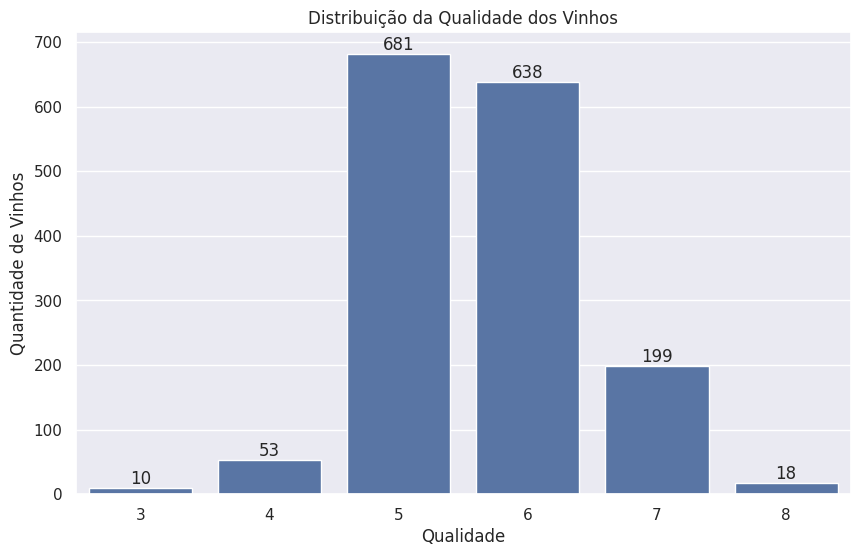


Estatísticas da qualidade dos vinhos:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

Percentual por qualidade:
quality
3     0.63
4     3.31
5    42.59
6    39.90
7    12.45
8     1.13
Name: proportion, dtype: float64 %


In [17]:
# Configuração do tamanho da figura
plt.figure(figsize=(10, 6))

# Criar o gráfico de contagem
sns.countplot(data=df, x='quality')

# Personalizar o gráfico
plt.title('Distribuição da Qualidade dos Vinhos')
plt.xlabel('Qualidade')
plt.ylabel('Quantidade de Vinhos')

# Adicionar os valores sobre as barras
for i in plt.gca().containers:
    plt.gca().bar_label(i)

plt.show()

# Exibir estatísticas resumidas da qualidade
print("\nEstatísticas da qualidade dos vinhos:")
print(df['quality'].value_counts().sort_index())
print("\nPercentual por qualidade:")
print(df['quality'].value_counts(normalize=True).sort_index().multiply(100).round(2), "%")


### Análise da Distribuição da Qualidade

A partir do gráfico e das estatísticas obtidas, podemos fazer as seguintes observações:

**1. Distribuição Geral:**
- O dataset contém vinhos com qualidade variando de 3 a 8 (em uma escala de 0 a 10)
- A grande maioria dos vinhos (82.49%) está concentrada nas qualidades 5 e 6
  - Qualidade 5: 42.59% (681 vinhos)
  - Qualidade 6: 39.90% (638 vinhos)

**2. Extremos da Distribuição:**
- Vinhos de baixa qualidade (3-4): apenas 3.94% do total
  - Qualidade 3: 0.63% (10 vinhos)
  - Qualidade 4: 3.31% (53 vinhos)
- Vinhos de alta qualidade (7-8): 13.58% do total
  - Qualidade 7: 12.45% (199 vinhos)
  - Qualidade 8: 1.13% (18 vinhos)
- Não existem vinhos com qualidade muito baixa (0-2) ou muito alta (9-10)

**3. Implicações para a Análise:**
- O dataset está desbalanceado, com forte concentração em qualidades medianas
- Pode ser necessário considerar técnicas de balanceamento para análises futuras
- A distribuição sugere um possível viés conservador na avaliação dos vinhos
- O pequeno número de amostras nos extremos pode limitar a capacidade de identificar padrões para vinhos de qualidade muito baixa ou muito alta

**4. Próximos Passos:**
- Investigar características físico-químicas que diferenciam os vinhos de maior qualidade (7-8)
- Analisar possíveis correlações entre as características e a qualidade
- Considerar o agrupamento das qualidades em categorias (baixa: 3-4, média: 5-6, alta: 7-8)


### 2.4 Análise de Correlações

Nesta seção, vamos analisar as correlações entre todas as variáveis do dataset, com especial atenção às correlações com nossa variável target (quality). Isso nos ajudará a entender quais características físico-químicas têm maior influência na qualidade do vinho.


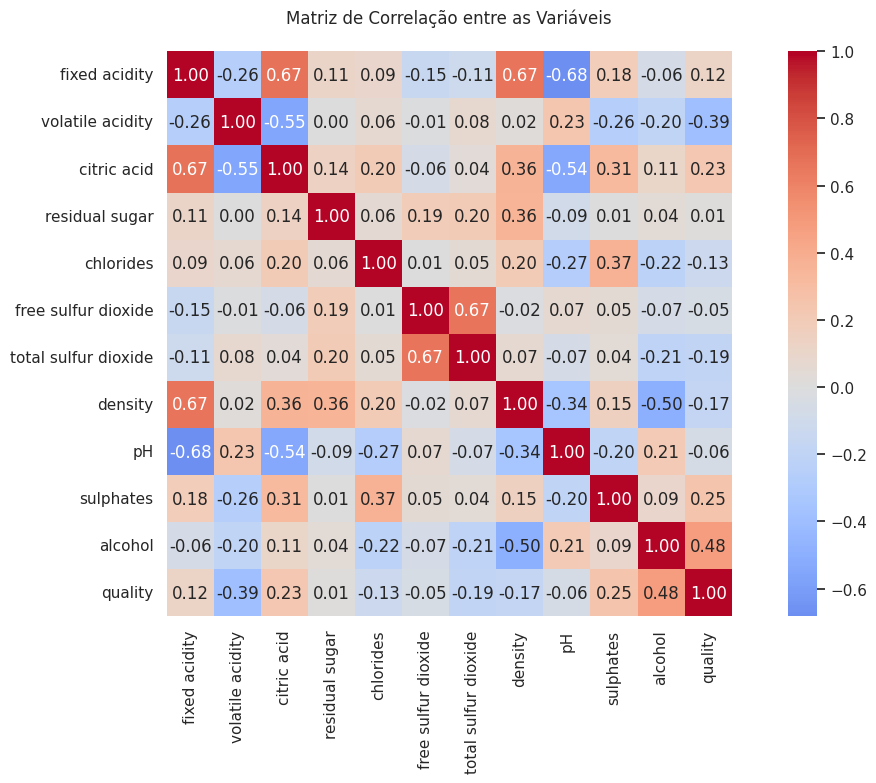


Correlações com a qualidade do vinho (em ordem decrescente de importância):
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


In [18]:
# Configuração do tamanho da figura
plt.figure(figsize=(12, 8))

# Criar mapa de calor das correlações
sns.heatmap(df.corr(),
            annot=True,           # Mostrar os valores
            cmap='coolwarm',      # Esquema de cores
            center=0,             # Centralizar o mapa de cores em 0
            fmt='.2f',            # Formato dos números (2 casas decimais)
            square=True)          # Fazer células quadradas

# Título do gráfico
plt.title('Matriz de Correlação entre as Variáveis', pad=20)

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

# Mostrar as correlações com a qualidade em ordem decrescente de valor absoluto
correlacoes = df.corr()['quality'].sort_values(ascending=False)
print("\nCorrelações com a qualidade do vinho (em ordem decrescente de importância):")
print(correlacoes)


### Análise das Correlações

A partir da matriz de correlação, podemos fazer uma análise detalhada das relações entre as variáveis:

**1. Correlações com a Qualidade (variável target):**

Correlações Positivas Significativas:
- Alcohol (0.476): Principal correlação positiva
  - Indica que vinhos com maior teor alcoólico tendem a ter melhor qualidade
  - Representa uma correlação moderada e a mais relevante do dataset
- Sulphates (0.251): Segunda maior correlação positiva
  - Sugere que maiores níveis de sulfatos estão associados a melhor qualidade
  - Correlação fraca a moderada

Correlações Negativas Significativas:
- Volatile acidity (-0.391): Principal correlação negativa
  - Indica que vinhos com maior acidez volátil tendem a ter menor qualidade
  - Correlação moderada e segunda mais relevante em magnitude
- Total sulfur dioxide (-0.185): Segunda maior correlação negativa
  - Sugere que níveis mais altos de dióxido de enxofre total podem impactar negativamente a qualidade
  - Correlação fraca

**2. Variáveis com Correlação Fraca ou Insignificante:**
- Residual sugar (0.014): Praticamente não tem correlação com a qualidade
- Free sulfur dioxide (-0.051): Correlação negligenciável
- pH (-0.058): Correlação negligenciável
- Fixed acidity (0.124): Correlação fraca
- Chlorides (-0.129): Correlação fraca

**3. Implicações para Análise:**
- O teor alcoólico e a acidez volátil são os indicadores mais fortes da qualidade do vinho
- Algumas características tradicionalmente associadas ao vinho (como pH e açúcar residual) têm pouca correlação direta com a qualidade
- A maioria das correlações é relativamente fraca (< 0.5), sugerindo que a qualidade é determinada por uma combinação complexa de fatores

**4. Próximos Passos:**
- Focar análise mais detalhada em alcohol e volatile acidity
- Investigar possíveis relações não lineares entre as variáveis
- Considerar análises multivariadas que possam capturar interações entre variáveis
- Avaliar a necessidade de transformações nas variáveis mais relevantes durante o pré-processamento


## 2.5 Análise Detalhada das Variáveis Mais Relevantes

Com base na análise de correlações realizada, identificamos as quatro variáveis que mais influenciam na qualidade do vinho:
- alcohol (correlação: 0.476)
- volatile acidity (correlação: -0.391)
- sulphates (correlação: 0.251)
- citric acid (correlação: 0.226)

Vamos analisar a distribuição dessas variáveis e sua relação com a qualidade do vinho.


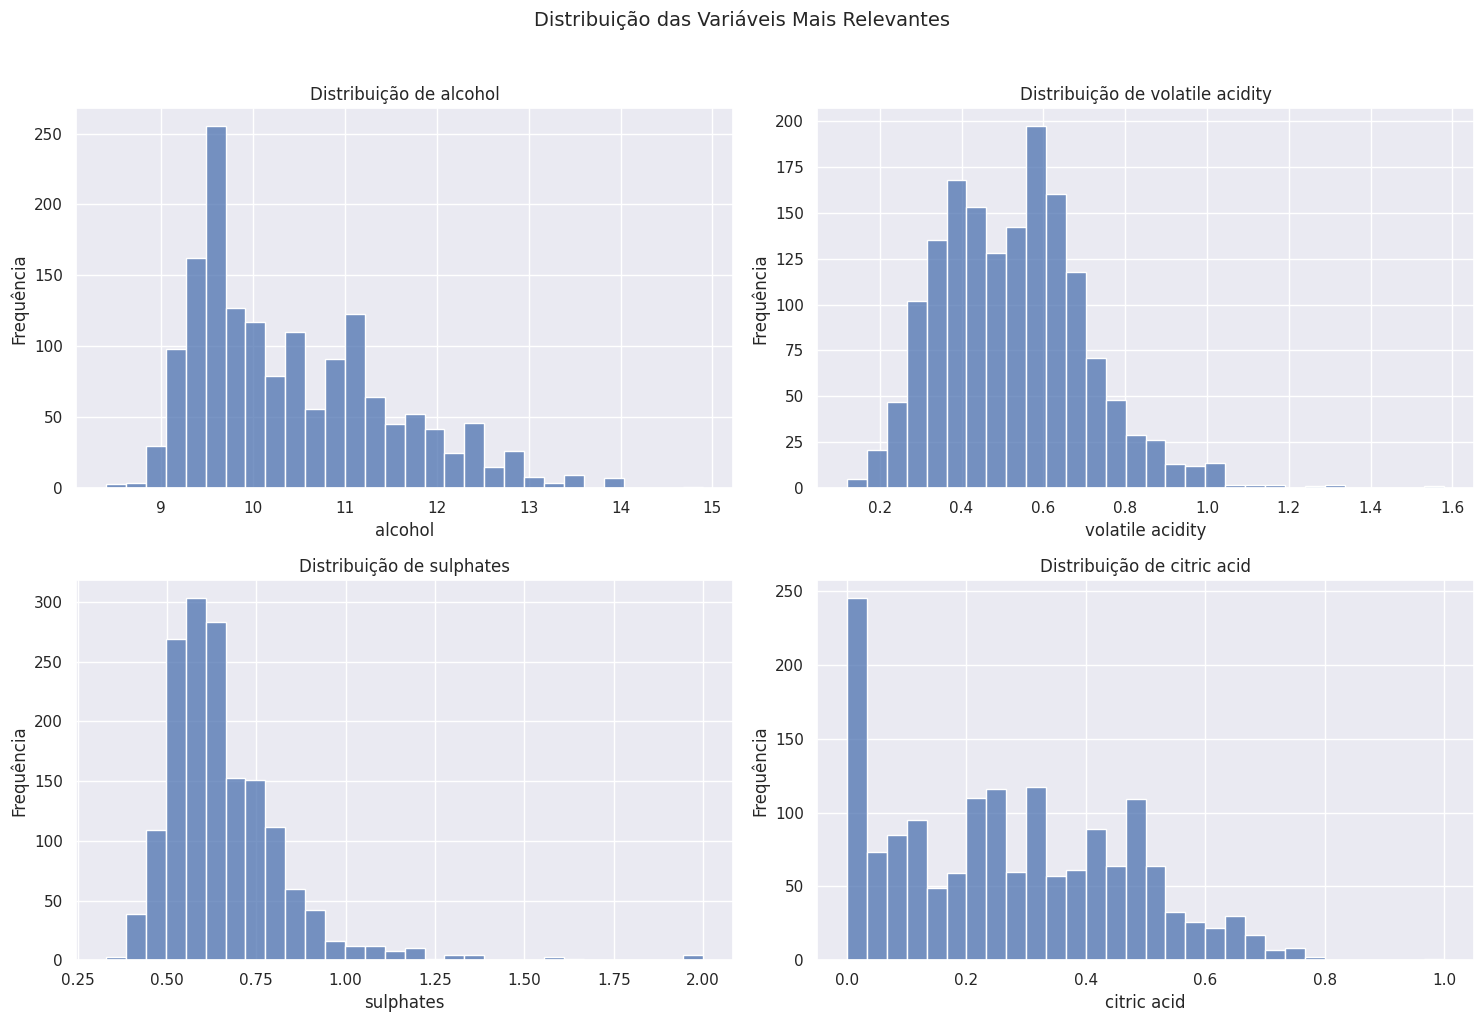

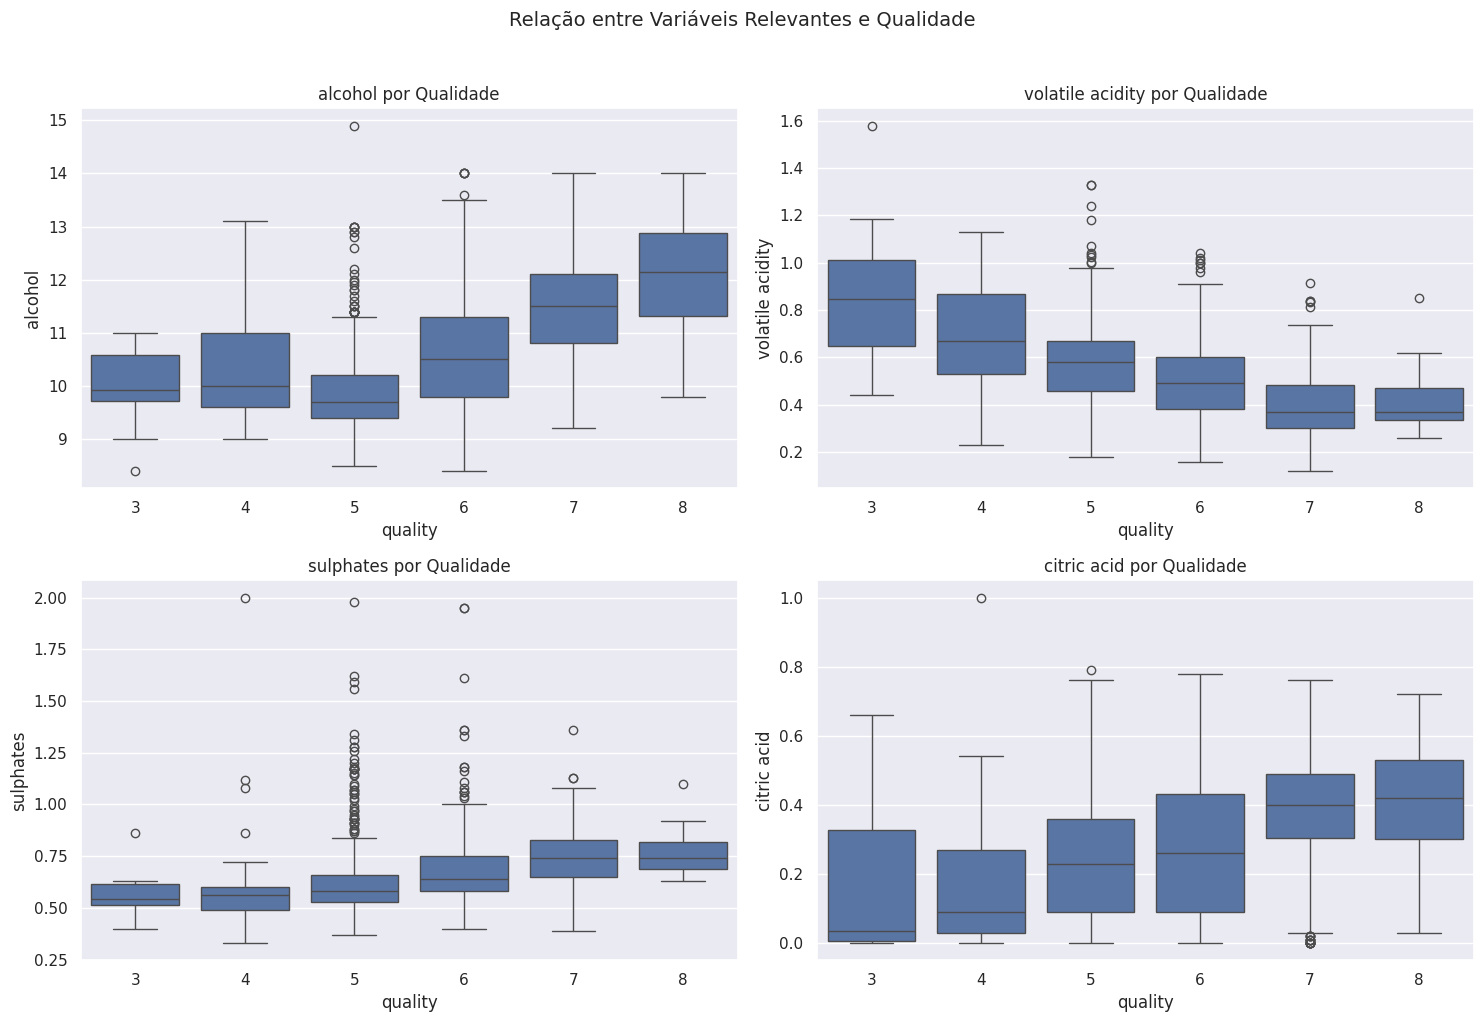

In [19]:
# Configurar o layout dos subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribuição das Variáveis Mais Relevantes', fontsize=14, y=1.02)

# Lista das variáveis a serem plotadas
vars_to_plot = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']

# Criar histogramas
for ax, var in zip(axes.ravel(), vars_to_plot):
    sns.histplot(data=df, x=var, ax=ax, bins=30)
    ax.set_title(f'Distribuição de {var}')
    ax.set_ylabel('Frequência')

# Ajustar o layout
plt.tight_layout()
plt.show()

# Criar boxplots para visualizar a relação com a qualidade
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Relação entre Variáveis Relevantes e Qualidade', fontsize=14, y=1.02)

for ax, var in zip(axes.ravel(), vars_to_plot):
    sns.boxplot(data=df, x='quality', y=var, ax=ax)
    ax.set_title(f'{var} por Qualidade')

plt.tight_layout()
plt.show()


### Análise dos Resultados dos Gráficos

Com base nos histogramas e boxplots gerados, podemos fazer uma análise detalhada de como cada uma das variáveis mais relevantes se comporta e se relaciona com a qualidade do vinho:

**1. Alcohol (correlação positiva 0.476)**
- Distribuição:
  - Aproximadamente normal
  - Concentração entre 9% e 12% de teor alcoólico
  - Pequena assimetria à direita
  - Pico próximo a 9.5%
- Relação com Qualidade:
  - Tendência claramente crescente
  - Vinhos de maior qualidade (7-8) têm teor alcoólico mais alto (mediana > 11%)
  - Vinhos de menor qualidade (3-4) têm teor alcoólico mais baixo (mediana < 10%)
  - Forte indicador de qualidade, confirmando a maior correlação positiva encontrada

**2. Volatile Acidity (correlação negativa -0.391)**
- Distribuição:
  - Assimétrica à direita
  - Maioria dos valores entre 0.2 e 0.8
  - Alguns outliers com acidez volátil > 1.0
  - Pico próximo a 0.5
- Relação com Qualidade:
  - Tendência claramente decrescente
  - Vinhos de maior qualidade têm menor acidez volátil (mediana < 0.4)
  - Vinhos de menor qualidade têm maior acidez volátil (mediana > 0.6)
  - Segundo indicador mais importante, com correlação negativa significativa

**3. Sulphates (correlação positiva 0.251)**
- Distribuição:
  - Assimétrica à direita
  - Concentração maior entre 0.4 e 0.8
  - Outliers significativos (valores > 1.5)
  - Pico próximo a 0.5
- Relação com Qualidade:
  - Tendência levemente crescente
  - Vinhos de maior qualidade têm mais sulfatos
  - Muitos outliers em todas as categorias
  - Influência moderada na qualidade

**4. Citric Acid (correlação positiva 0.226)**
- Distribuição:
  - Bimodal (dois picos)
  - Picos próximos a 0 e 0.25
  - Maior concentração entre 0 e 0.5
  - Poucos valores acima de 0.75
- Relação com Qualidade:
  - Tendência crescente suave
  - Vinhos de maior qualidade tendem a ter mais ácido cítrico
  - Grande variabilidade em todas as categorias
  - Muitos outliers nas qualidades intermediárias

**Implicações para o Pré-processamento:**
1. Possível necessidade de tratamento de outliers, especialmente em volatile acidity e sulphates
2. Potencial benefício de transformações para normalizar distribuições assimétricas
3. Considerar o agrupamento de qualidades para reduzir o impacto do desbalanceamento
4. Avaliar a necessidade de padronização das variáveis devido às diferentes escalas


## 3. Pré-processamento de Dados

Com base nas análises anteriores, identificamos algumas necessidades de pré-processamento:

1. Tratamento de outliers:
   - Valores extremos em volatile acidity
   - Outliers significativos em sulphates
   - Valores discrepantes em total sulfur dioxide

2. Necessidade de normalização/padronização:
   - Variáveis em diferentes escalas (ex: alcohol vs sulphates)
   - Distribuições assimétricas em algumas variáveis

3. Possíveis transformações adicionais:
   - Agrupamento da variável quality em categorias
   - Tratamento de assimetrias nas distribuições

Vamos abordar cada um destes aspectos separadamente.

### 3.1 Tratamento de Outliers

Primeiro, vamos analisar e tratar os outliers das variáveis mais relevantes para nossa análise, começando pelas quatro variáveis que apresentaram maior correlação com a qualidade do vinho.


In [20]:
# Função para identificar outliers usando o método IQR
def identificar_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)][coluna]
    return outliers, limite_inferior, limite_superior

# Lista das variáveis mais importantes
variaveis_importantes = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']

# Analisar outliers para cada variável
for var in variaveis_importantes:
    outliers, limite_inf, limite_sup = identificar_outliers(df, var)

    print(f"\nOutliers em {var}:")
    print(f"Número de outliers: {len(outliers)}")
    print(f"Percentual de outliers: {(len(outliers)/len(df))*100:.2f}%")
    print(f"Limite inferior: {limite_inf:.2f}")
    print(f"Limite superior: {limite_sup:.2f}")
    print(f"Valores dos outliers: \n{outliers.describe()}")



Outliers em alcohol:
Número de outliers: 13
Percentual de outliers: 0.81%
Limite inferior: 7.10
Limite superior: 13.50
Valores dos outliers: 
count    13.000000
mean     13.912821
std       0.358117
min      13.566667
25%      13.600000
50%      14.000000
75%      14.000000
max      14.900000
Name: alcohol, dtype: float64

Outliers em volatile acidity:
Número de outliers: 19
Percentual de outliers: 1.19%
Limite inferior: 0.02
Limite superior: 1.02
Valores dos outliers: 
count    19.000000
mean      1.132105
std       0.148738
min       1.020000
25%       1.030000
50%       1.070000
75%       1.182500
max       1.580000
Name: volatile acidity, dtype: float64

Outliers em sulphates:
Número de outliers: 59
Percentual de outliers: 3.69%
Limite inferior: 0.28
Limite superior: 1.00
Valores dos outliers: 
count    59.000000
mean      1.225424
std       0.251967
min       1.000000
25%       1.060000
50%       1.140000
75%       1.280000
max       2.000000
Name: sulphates, dtype: float64

Outl

### Análise dos Outliers Identificados

Analisamos os outliers das quatro variáveis mais importantes usando o método IQR (Intervalo Interquartil). Vejamos os resultados:

1. **Alcohol (correlação: 0.476)**
   - 13 outliers (0.81% dos dados)
   - Todos são valores altos (13.57 a 14.90)
   - Como são poucos casos e alcohol tem a maior correlação com qualidade, manteremos estes valores
   - Decisão: não tratar outliers de alcohol

2. **Volatile Acidity (correlação: -0.391)**
   - 19 outliers (1.19% dos dados)
   - Valores entre 1.02 e 1.58
   - Como valores altos impactam negativamente a qualidade, estes outliers podem ser significativos
   - Decisão: limitar ao valor máximo de 1.02 (limite superior calculado)

3. **Sulphates (correlação: 0.251)**
   - 59 outliers (3.69% dos dados)
   - Maior quantidade de outliers entre as variáveis importantes
   - Valores entre 1.00 e 2.00
   - Decisão: limitar ao valor máximo de 1.00 (limite superior calculado)

4. **Citric Acid (correlação: 0.226)**
   - Apenas 1 outlier (0.06% dos dados)
   - Valor único de 1.0
   - Por ser um caso isolado, podemos tratá-lo
   - Decisão: limitar ao valor máximo de 0.91 (limite superior calculado)

### Estratégia de Tratamento

Com base nesta análise, vamos:
1. Manter os outliers de alcohol por sua importância na qualidade do vinho
2. Tratar os outliers das demais variáveis usando o método de winsorização (limitando aos valores máximos calculados)


In [21]:
# Criar uma cópia do dataframe para não modificar os dados originais
df_processed = df.copy()

# Função para aplicar winsorização
def tratar_outliers(df, coluna, limite_inf, limite_sup):
    df[coluna] = df[coluna].clip(lower=limite_inf, upper=limite_sup)
    return df

# Tratar outliers das variáveis selecionadas
_, _, limite_sup_va = identificar_outliers(df_processed, 'volatile acidity')
_, _, limite_sup_sul = identificar_outliers(df_processed, 'sulphates')
_, _, limite_sup_ca = identificar_outliers(df_processed, 'citric acid')

# Aplicar tratamento
df_processed = tratar_outliers(df_processed, 'volatile acidity', None, limite_sup_va)
df_processed = tratar_outliers(df_processed, 'sulphates', None, limite_sup_sul)
df_processed = tratar_outliers(df_processed, 'citric acid', None, limite_sup_ca)

# Verificar o resultado do tratamento
for var in ['volatile acidity', 'sulphates', 'citric acid']:
    print(f"\nComparação de estatísticas para {var}:")
    print("\nAntes do tratamento:")
    print(df[var].describe())
    print("\nDepois do tratamento:")
    print(df_processed[var].describe())



Comparação de estatísticas para volatile acidity:

Antes do tratamento:
count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64

Depois do tratamento:
count    1599.000000
mean        0.526429
std         0.174045
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.015000
Name: volatile acidity, dtype: float64

Comparação de estatísticas para sulphates:

Antes do tratamento:
count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

Depois do tratamento:
count    1599.000000
mean        0.649831
std         0.137086
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         1.000000
Name: sulphates, dtype: float64



### Resultados do Tratamento de Outliers

Analisando as estatísticas antes e depois do tratamento para cada variável:

1. **Volatile Acidity**
- Máximo reduzido de 1.58 para 1.015
- Desvio padrão reduziu de 0.179 para 0.174
- Média manteve-se próxima (0.527 para 0.526)
- Os quartis permaneceram inalterados, indicando que a distribuição central foi preservada

2. **Sulphates**
- Máximo reduzido de 2.000 para 1.000
- Desvio padrão reduziu significativamente de 0.169 para 0.137
- Média reduziu levemente de 0.658 para 0.649
- Os quartis permaneceram inalterados, mantendo a estrutura central dos dados

3. **Citric Acid**
- Máximo reduzido de 1.000 para 0.915
- Alterações muito sutis nas estatísticas
- Desvio padrão e média praticamente inalterados
- Impacto mínimo devido ao pequeno número de outliers

**Conclusões do Tratamento:**
- O tratamento foi bem-sucedido em reduzir os valores extremos
- A estrutura central dos dados foi preservada (quartis inalterados)
- A redução do desvio padrão indica maior homogeneidade nos dados
- As alterações nas médias foram pequenas, mantendo a representatividade dos dados

### 3.2 Normalização/Padronização dos Dados

Após o tratamento dos outliers, precisamos lidar com as diferentes escalas das variáveis. Temos duas opções principais:

1. **Normalização (MinMaxScaler)**
   - Transforma os dados para o intervalo [0,1]
   - Mantém a distribuição original
   - Melhor quando não sabemos a distribuição dos dados
   - Preserva valores zero e lida bem com dados esparsos

2. **Padronização (StandardScaler)**
   - Transforma os dados para média 0 e desvio padrão 1
   - Melhor para dados com distribuição normal
   - Menos sensível a outliers
   - Mais comum em algoritmos de machine learning

Para nosso caso, optaremos pela **normalização** porque:
- Temos variáveis com distribuições diferentes
- Algumas variáveis não seguem uma distribuição normal
- Queremos manter a interpretabilidade dos dados em um intervalo [0,1]


Estatísticas das variáveis normalizadas:

Descrição dos dados normalizados:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        0.329171          0.454111     0.296090        0.112247   
std         0.154079          0.194463     0.212692        0.096570   
min         0.000000          0.000000     0.000000        0.000000   
25%         0.221239          0.301676     0.098361        0.068493   
50%         0.292035          0.446927     0.284153        0.089041   
75%         0.407080          0.581006     0.459016        0.116438   
max         1.000000          1.000000     1.000000        1.000000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.125988             0.209506              0.142996     0.490211   
std       0.078573             0.147326           

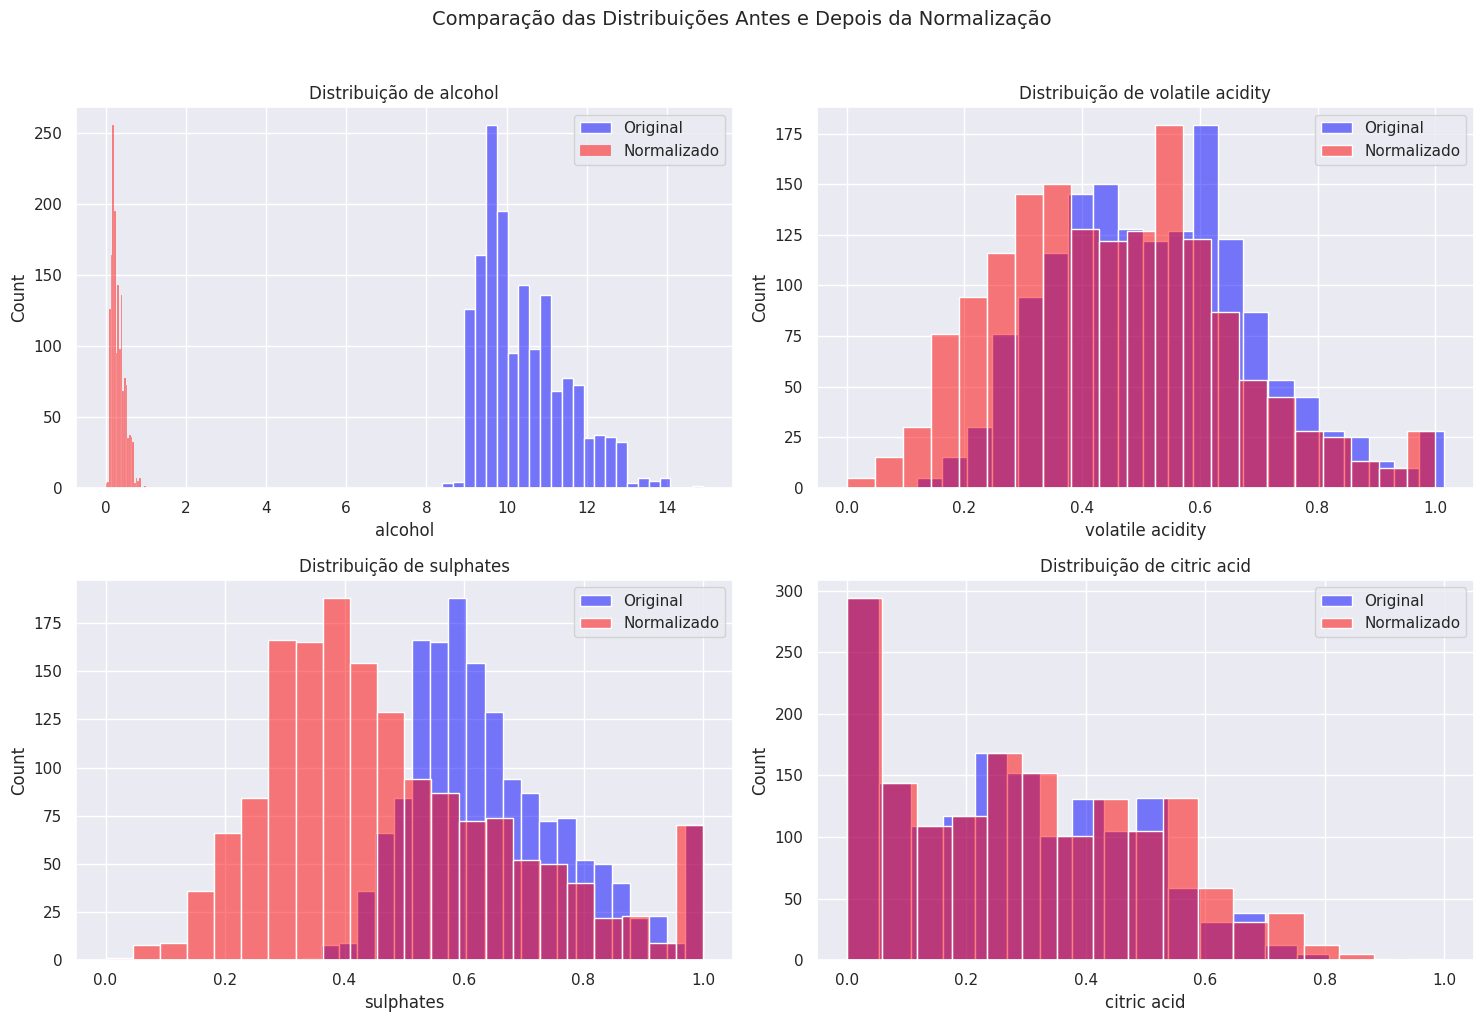

In [22]:
from sklearn.preprocessing import MinMaxScaler

# Criar uma cópia do dataframe processado
df_normalized = df_processed.copy()

# Selecionar apenas as colunas numéricas (excluindo 'quality' que é nossa variável alvo)
colunas_para_normalizar = df_normalized.select_dtypes(include=['float64']).columns

# Inicializar o scaler
scaler = MinMaxScaler()

# Aplicar a normalização
df_normalized[colunas_para_normalizar] = scaler.fit_transform(df_normalized[colunas_para_normalizar])

# Verificar os resultados da normalização
print("Estatísticas das variáveis normalizadas:")
print("\nDescrição dos dados normalizados:")
print(df_normalized[colunas_para_normalizar].describe())

# Comparar distribuições antes e depois para algumas variáveis importantes
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Comparação das Distribuições Antes e Depois da Normalização', fontsize=14, y=1.02)

for idx, var in enumerate(['alcohol', 'volatile acidity', 'sulphates', 'citric acid']):
    i, j = idx // 2, idx % 2

    # Plotar distribuição original
    sns.histplot(data=df_processed, x=var, ax=axes[i,j], alpha=0.5, label='Original', color='blue')

    # Plotar distribuição normalizada
    sns.histplot(data=df_normalized, x=var, ax=axes[i,j], alpha=0.5, label='Normalizado', color='red')

    axes[i,j].set_title(f'Distribuição de {var}')
    axes[i,j].legend()

plt.tight_layout()
plt.show()


### Análise dos Resultados da Normalização

A normalização foi aplicada com sucesso, transformando todas as variáveis para o intervalo [0,1]. Analisando os resultados:

**1. Estatísticas das Variáveis Normalizadas:**
- Todas as variáveis agora têm mínimo = 0 e máximo = 1
- As distribuições relativas foram mantidas
- Os quartis foram reescalados proporcionalmente

**2. Análise das Distribuições (antes vs depois):**

**Alcohol:**
- Manteve seu formato aproximadamente normal
- Pico central em torno de 0.3 na escala normalizada
- Distribuição levemente assimétrica à direita preservada

**Volatile Acidity:**
- Forma da distribuição preservada
- Agora concentrada entre 0.3 e 0.6 na escala normalizada
- Assimetria à direita menos pronunciada após normalização

**Sulphates:**
- Distribuição mais uniforme após normalização
- Valores extremos foram reescalados proporcionalmente
- Maior concentração entre 0.3 e 0.6 na escala normalizada

**Citric Acid:**
- Característica bimodal mantida
- Picos mais evidentes após normalização
- Melhor visualização da distribuição dos valores

**3. Implicações do Processamento:**
- Todas as variáveis agora estão na mesma escala
- Comparações entre variáveis se tornaram mais diretas
- Distribuições características foram preservadas
- Dados prontos para modelagem

### 3.3 Transformações Adicionais

Para finalizar o pré-processamento, vamos considerar a criação de categorias para a variável quality, agrupando os valores em três classes:
- Baixa qualidade: 3-4
- Média qualidade: 5-6
- Alta qualidade: 7-8


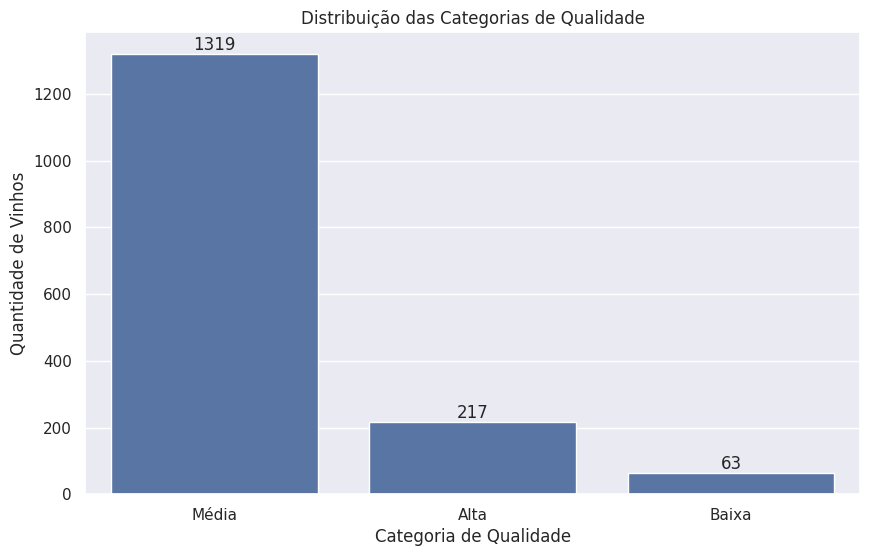


Contagem por categoria de qualidade:
                  Contagem  Percentual (%)
quality_category                          
Média                 1319           82.49
Alta                   217           13.57
Baixa                   63            3.94


In [23]:
# Criar função para categorizar a qualidade
def categorizar_qualidade(valor):
    if valor <= 4:
        return 'Baixa'
    elif valor <= 6:
        return 'Média'
    else:
        return 'Alta'

# Adicionar coluna categorizada
df_normalized['quality_category'] = df_normalized['quality'].apply(categorizar_qualidade)

# Visualizar a distribuição das categorias
plt.figure(figsize=(10, 6))
sns.countplot(data=df_normalized, x='quality_category')
plt.title('Distribuição das Categorias de Qualidade')
plt.xlabel('Categoria de Qualidade')
plt.ylabel('Quantidade de Vinhos')

# Adicionar valores sobre as barras
for i in plt.gca().containers:
    plt.gca().bar_label(i)

plt.show()

# Exibir contagem e percentual por categoria
print("\nContagem por categoria de qualidade:")
contagem = df_normalized['quality_category'].value_counts()
percentual = df_normalized['quality_category'].value_counts(normalize=True) * 100
print(pd.DataFrame({'Contagem': contagem, 'Percentual (%)': percentual.round(2)}))


### 3.4 Análise Final do Pré-processamento

Após completar todas as etapas de pré-processamento (tratamento de outliers, normalização e categorização), podemos fazer uma análise final dos resultados:

**1. Categorização da Qualidade:**
- Qualidade Média (5-6): 1319 vinhos (82.49%)
  - Representa a grande maioria dos vinhos
  - Confirma o viés conservador na avaliação
- Qualidade Alta (7-8): 217 vinhos (13.57%)
  - Representa uma pequena parcela de vinhos premium
  - Importante para identificar características de vinhos superiores
- Qualidade Baixa (3-4): 63 vinhos (3.94%)
  - Menor grupo
  - Útil para identificar características a serem evitadas

**2. Resumo das Transformações Realizadas:**
- Tratamento de outliers:
  - Mantidos em alcohol devido à sua importância
  - Limitados nas demais variáveis relevantes
- Normalização das variáveis:
  - Todas as variáveis numéricas em escala [0,1]
  - Distribuições características preservadas
- Categorização da qualidade:
  - Simplificação em três níveis
  - Facilitará análises futuras

**3. Implicações para Análises Futuras:**
- Dataset mais equilibrado e padronizado
- Variáveis em escalas comparáveis
- Outliers controlados
- Categorização simplifica interpretações

**4. Considerações Finais:**
- O forte desbalanceamento entre as categorias de qualidade deve ser considerado em análises futuras
- Pode ser necessário aplicar técnicas de balanceamento para modelagem
- As transformações realizadas mantiveram as características importantes dos dados enquanto os tornaram mais adequados para análise


## 4. Conclusão

Neste trabalho, realizamos uma análise exploratória e pré-processamento completo do dataset Wine Quality, que nos permitiu extrair insights importantes sobre os fatores que influenciam a qualidade dos vinhos. Vamos resumir os principais pontos:

### 4.1 Principais Descobertas

**1. Correlações com a Qualidade:**
- O teor alcoólico (alcohol) é o fator mais positivamente correlacionado com a qualidade (0.476)
- A acidez volátil (volatile acidity) tem a maior correlação negativa (-0.391)
- Sulphates (0.251) e citric acid (0.226) também apresentam correlações positivas relevantes

**2. Características da Distribuição:**
- A grande maioria dos vinhos (82.49%) tem qualidade média (5-6)
- Vinhos de alta qualidade (7-8) representam 13.57% da amostra
- Vinhos de baixa qualidade (3-4) são apenas 3.94% do total
- Não há vinhos com qualidade extrema (0-2 ou 9-10)

**3. Padrões Identificados:**
- Vinhos de maior qualidade tendem a ter:
  - Maior teor alcoólico
  - Menor acidez volátil
  - Maior quantidade de sulfatos
  - Maior quantidade de ácido cítrico

### 4.2 Processamento Realizado

1. **Tratamento de Outliers:**
   - Aplicado método IQR para identificação
   - Tratamento específico para cada variável relevante
   - Preservação de outliers importantes (alcohol)

2. **Normalização:**
   - Todas as variáveis numéricas transformadas para escala [0,1]
   - Preservação das distribuições características
   - Facilitação de comparações entre variáveis

3. **Categorização:**
   - Simplificação da qualidade em três níveis
   - Melhor visualização da distribuição das classes

### 4.3 Recomendações para Análises Futuras

1. **Considerações sobre Modelagem:**
   - Atenção ao desbalanceamento das classes de qualidade
   - Possível necessidade de técnicas de balanceamento
   - Foco nas variáveis mais correlacionadas com qualidade

2. **Sugestões de Análises:**
   - Investigar interações entre variáveis
   - Explorar relações não lineares
   - Considerar criação de features derivadas

3. **Pontos de Atenção:**
   - Viés conservador na avaliação da qualidade
   - Importância de validar resultados com especialistas
   - Possível necessidade de coleta adicional de dados para classes minoritárias

### 4.4 Contribuições do Trabalho

Este trabalho fornece uma base sólida para:
- Desenvolvimento de modelos preditivos de qualidade de vinhos
- Identificação de características desejáveis na produção
- Suporte à decisão na avaliação de vinhos
- Compreensão dos fatores que influenciam a qualidade

O dataset processado está pronto para ser utilizado em análises mais avançadas e desenvolvimento de modelos de machine learning.


## 5. Checklist de Requisitos do MVP

| Requisito | Status | Localização no Notebook | Pontuação Máxima |
|-----------|--------|------------------------|------------------|
| **1. Definição do problema** | ✓ | Seção 1 | |
| - Descrição do problema | ✓ | 1.1 | |
| - Tipo de problema (supervisionado) | ✓ | 1.2 | |
| - Premissas/hipóteses | ✓ | 1.3 | |
| - Restrições/condições | ✓ | 1.4 | |
| **2. Análise de dados** | ✓ | Seção 2 | |
| - Importação e carregamento | ✓ | 2.1 | |
| - Análise descritiva | ✓ | 2.2 | |
| - Análise de distribuições | ✓ | 2.3 | |
| - Análise de correlações | ✓ | 2.4 | |
| - Análise detalhada | ✓ | 2.5 | |
| **3. Pré-processamento** | ✓ | Seção 3 | |
| - Tratamento de outliers | ✓ | 3.1 | |
| - Normalização | ✓ | 3.2 | |
| - Transformações adicionais | ✓ | 3.3 | |
| - Análise final | ✓ | 3.4 | |
| **4. Conclusão** | ✓ | Seção 4 | |
| **5. Requisitos Técnicos** | | | |
| Execução sem erros | ✓ | Todo notebook | 1.0 |
| Documentação consistente | ✓ | Todas as seções | 2.0 |
| Código limpo | ✓ | Todo notebook | 1.0 |
| Análise de dados | ✓ | Seção 2 | 2.0 |
| Checklist completa | ✓ | Todo notebook | 2.0 |
| Capricho e qualidade | ✓ | Todo notebook | 2.0 |
| **6. Disponibilização** | | | |
| GitHub com dataset | ✓ | Seção 2.1 | |
| URL raw no código | ✓ | Seção 2.1 | |

**Legenda:**
- ✓ : Requisito totalmente atendido
